In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as ml

%matplotlib inline

/home/kota/miniconda3/envs/nnet/lib/python3.5/site-packages/matplotlib/font_manager.py:279: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


## Follow the official "get started" 

References:

- https://www.tensorflow.org/get_started/get_started

In [2]:
tf.reset_default_graph()   # remove the graphs already made.  
                           # otherwise may cause name conflict

#create scalar constant tensors
# scalars are rank 0 tensor

node1 = tf.constant(3.0, dtype=tf.float32)
node2 = tf.constant(4.0, dtype=tf.float32)
print(node1)
print(node2)

# shape is empty because they are scalars
print(node1.get_shape())
print(node2.get_shape())


Tensor("Const:0", shape=(), dtype=float32)
Tensor("Const_1:0", shape=(), dtype=float32)
()
()


In [3]:
# tensors must be evaluated within a session
# Session.run() takes tensors and evaluate them
with tf.Session() as sess:
    print(sess.run([node1, node2]))
    
# tf.rank() returns the rank of an object as a tensor
# rank zero means a scalar
with tf.Session() as sess:
    print(sess.run([tf.rank(node1), tf.rank(node2)])) 

[3.0, 4.0]
[0, 0]


In [4]:
# tensors support a variety of operations
# tf.add(x, y) creates a tensor that adds up two tensors x and y
node3 = tf.add(node1, node2)
print(node3)
with tf.Session() as sess:
    print(sess.run(node3))

Tensor("Add:0", shape=(), dtype=float32)
7.0


In [5]:
# placeholders defines a tensor for which values are supplied later 
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
c = tf.add(a, b)
with tf.Session() as sess:
    print(sess.run(c, {a: -1.0, b: 3}))

# vector values can be fed
with tf.Session() as sess:
    print(sess.run(c, {a: [-1.0, 10.0], b: [3.0, 4.0]}))

2.0
[  2.  14.]


In [6]:
# Variables are trainable parameters
W = tf.Variable([0.3], dtype=tf.float32, name="weight")
b = tf.Variable([-0.3], dtype=tf.float32, name="bias")
x = tf.placeholder(tf.float32)
yhat = tf.add(tf.multiply(W, x), b, name="yhat")

print(W)
print(b)
print(x)
print(yhat)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(yhat, {x: [1, 2, 3, 4]}))
    

<tf.Variable 'weight:0' shape=(1,) dtype=float32_ref>
<tf.Variable 'bias:0' shape=(1,) dtype=float32_ref>
Tensor("Placeholder_2:0", dtype=float32)
Tensor("yhat:0", dtype=float32)
[ 0.          0.30000001  0.60000002  0.90000004]


In [7]:
# compare and train with true values
y = tf.placeholder(tf.float32)
loss = tf.reduce_mean(tf.square(tf.subtract(y, yhat)))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(loss, {x: [1, 2, 3, 4], y: [0.1, -1.1, -1.8, -3.0]}))

# set values mannually to W and b to improve the fit
# `tf.assign()` defines an operation to change variable values
# note that this does not happen until given to `run`
fixW = tf.assign(W, [-1.0])
fixb = tf.assign(b, [1.0])
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run([fixW, fixb])
    print(sess.run(loss, {x: [1, 2, 3, 4], y: [0.1, -1.1, -1.8, -3.0]}))


5.735
0.015


In [8]:
# supervised training to find better variables values
# `train` here defines an operation to reduces the loss by
# the gradient descent
# again, this shall be given to `run` to invoke it
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # update the variables for multiple times
    for i in range(1000):
        sess.run(train, {x: [1, 2, 3, 4], y: [0.1, -1.1, -1.8, -3.0]})
    
    print(sess.run(loss, {x: [1, 2, 3, 4], y: [0.1, -1.1, -1.8, -3.0]}))
    print(sess.run([W, b]))
    # or print the values by
    print(W.eval(), b.eval())

0.0135716
[array([-0.97275525], dtype=float32), array([ 0.96989703], dtype=float32)]
[-0.97275525] [ 0.96989703]


## Computation graph example

References: 

- Saito, K (2016). Deep Learning from Scratch, O'Reilly Japan.

In [9]:
tf.reset_default_graph()

# Fig 5-17. p.140
num_apple    = tf.placeholder(tf.float32)
price_apple  = tf.Variable([100.0], tf.float32)
num_orange   = tf.placeholder(tf.float32)
price_orange = tf.Variable([150.0], tf.float32)
taxrate      = tf.Variable([0.1], tf.float32)

pretax       = tf.add(tf.multiply(num_apple,  price_apple),
                      tf.multiply(num_orange, price_orange))
expenditure  = tf.add(pretax, tf.multiply(pretax, taxrate))
print(num_apple)
print(price_apple)
print(num_orange)
print(price_orange)
print(taxrate)
print(pretax)
print(expenditure)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(expenditure, {num_apple: 2, num_orange: 3}))

Tensor("Placeholder:0", dtype=float32)
<tf.Variable 'Variable:0' shape=(1,) dtype=float32_ref>
Tensor("Placeholder_1:0", dtype=float32)
<tf.Variable 'Variable_1:0' shape=(1,) dtype=float32_ref>
<tf.Variable 'Variable_2:0' shape=(1,) dtype=float32_ref>
Tensor("Add:0", dtype=float32)
Tensor("Add_1:0", dtype=float32)
[ 715.]


In [10]:
# compute the grandients
# tf.gradients(y, x) to get dy/dx

grads = tf.gradients(
    expenditure, 
    [num_apple, price_apple, num_orange, price_orange, taxrate]
)
print(grads)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(grads, {num_apple: 2, num_orange: 3}))

[<tf.Tensor 'gradients/Mul_grad/Reshape:0' shape=<unknown> dtype=float32>, <tf.Tensor 'gradients/Mul_grad/Reshape_1:0' shape=(1,) dtype=float32>, <tf.Tensor 'gradients/Mul_1_grad/Reshape:0' shape=<unknown> dtype=float32>, <tf.Tensor 'gradients/Mul_1_grad/Reshape_1:0' shape=(1,) dtype=float32>, <tf.Tensor 'gradients/Mul_2_grad/Reshape_1:0' shape=(1,) dtype=float32>]
[110.0, array([ 2.20000005], dtype=float32), 165.0, array([ 3.30000019], dtype=float32), array([ 650.], dtype=float32)]


## Minimizing quadratic functions

In [11]:
tf.reset_default_graph()

a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
c = tf.placeholder(tf.float32)
x = tf.Variable(0.0, tf.float32)

y = a*x*x + b*x + c

print(a)
print(b)
print(c)
print(x)
print(y)

# find the mimimum
optimizer = tf.train.GradientDescentOptimizer(0.1)
train = optimizer.minimize(y)

data = {a: 0.5, b: 5.0, c: 3.0}
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # update the variables for multiple times
    for i in range(100):
        sess.run(train, data)
    
    print(sess.run([x, y], data))

# expected: x = -b/(2a)
x_star = -data[b]/data[a]/2
y_star = data[a]*x_star*x_star + data[b]*x_star + data[c]
print("expected: x = ", x_star, "y = ", y_star)

Tensor("Placeholder:0", dtype=float32)
Tensor("Placeholder_1:0", dtype=float32)
Tensor("Placeholder_2:0", dtype=float32)
<tf.Variable 'Variable:0' shape=() dtype=float32_ref>
Tensor("add_1:0", dtype=float32)
[-4.999867, -9.499999]
expected: x =  -5.0 y =  -9.5


## Estimating and maximizing a production function

We will generate a dummy data of $(K, L, Y)$ from $Y = K^\alpha L^{1-\alpha}$ and estimate $Y = f(K, L)$ by neural net.  Then, we will maximize: $f(K, L)$ subject to $r K + w L = M$.

This optimization problem has an analytic solution: 

$K^* = \frac{\alpha M}{r}, L^* = \frac{(1-\alpha)M}{w}$ 

We expect the optimization results are close to these.

In [12]:
def cobb_douglas(K, L, alpha):
    Y = np.power(K, alpha) * np.power(L, 1-alpha)
    return Y

def generate_cobb_douglas(N, alpha):
    """
    Generate (K, L, Y) such that Y = K^alpha L^(1-alpha) 
    
    K and L are generated from independent exponential distribution with mean 1
    
    N       : number of observation
    alpha   : power to K
    sigma   : standard deviation of epsilon 
    """
    K = np.random.exponential(1, (N,))
    L = np.random.exponential(1, (N,))
    Y = cobb_douglas(K, L, alpha)
    
    return K, L, Y

Ks, Ls, Ys = generate_cobb_douglas(100, 0.3)

# this should be very close to zero
np.max(np.abs(np.log(Ys) - 0.3 * np.log(Ks) - 0.7 * np.log(Ls)))

4.4408920985006262e-16

In [13]:
tf.reset_default_graph()

# 4 layer full-connected neural net
X  = tf.placeholder(tf.float32, shape=[None, 2])

W1 = tf.get_variable("W1", shape=[2, 20], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.get_variable("b1", shape=[20], initializer=tf.contrib.layers.xavier_initializer())
A1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.get_variable("W2", shape=[20, 20], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.get_variable("b2", shape=[20], initializer=tf.contrib.layers.xavier_initializer())
A2 = tf.nn.relu(tf.matmul(A1, W2) + b2)

W3 = tf.get_variable("W3", shape=[20, 20], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.get_variable("b3", shape=[20], initializer=tf.contrib.layers.xavier_initializer())
A3 = tf.nn.relu(tf.matmul(A2, W3) + b3)

W4 = tf.get_variable("W4", shape=[20, 1], initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.get_variable("b4", shape=[1], initializer=tf.contrib.layers.xavier_initializer())
O  = tf.matmul(A3, W4) + b4

# squared error 
Y = tf.placeholder(tf.float32)    
loss = tf.reduce_mean(tf.square(O - Y))

# optimizer
train = tf.train.GradientDescentOptimizer(0.2).minimize(loss)

In [14]:
Ks, Ls, Ys = generate_cobb_douglas(1000, 0.3)
in_x = np.vstack((Ks, Ls)).transpose()
in_y = Ys.reshape(1000, 1)

data = {X: in_x, Y: in_y}

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(2000):
        sess.run(train, feed_dict=data)
        if i % 100 == 0:
            print(i, sess.run(loss, data))
    print(sess.run(loss, data))
    
    # generate (K, L, Y) from the model
    Ks, Ls, Ys = generate_cobb_douglas(1000, 0.3)
    Yhat = sess.run(O, {X: np.vstack((Ks, Ls)).transpose()})
    
    # keep the trained weights and biases
    parameters = {
        "W1": W1.eval(), "b1": b1.eval(),
        "W2": W2.eval(), "b2": b2.eval(),
        "W3": W3.eval(), "b3": b3.eval(),
        "W4": W4.eval(), "b4": b4.eval(),
    }
    

0 0.253774
100 0.0745693
200 0.0365023
300 0.0262334
400 0.0194465
500 0.0159778
600 0.0127158
700 0.0116209
800 0.0100082
900 0.00813576
1000 0.00707847
1100 0.0064242
1200 0.00584881
1300 0.00469448
1400 0.00490344
1500 0.00483754
1600 0.00502829
1700 0.00469204
1800 0.00385415
1900 0.00404476
0.00344663


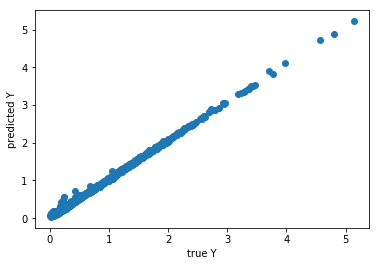

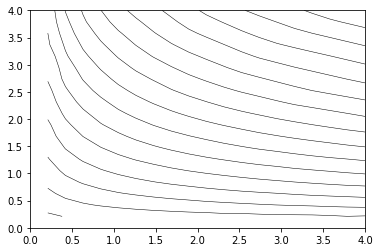

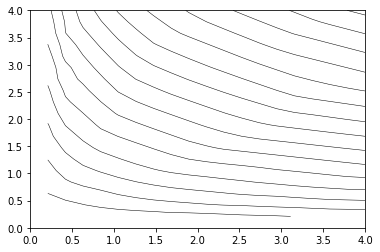

In [15]:
# plot the result
plt.scatter(Ys, Yhat)
plt.xlabel("true Y")
plt.ylabel("predicted Y")
plt.show()

# contour plot
def my_contour(x, y, z, xmin=0, xmax=4, nx=20, ymin=0, ymax=4, ny=20):
    xi = np.linspace(xmin, xmax, nx)
    yi = np.linspace(ymin, ymax, ny)
    zi = ml.griddata(x, y, z, xi, yi, interp='linear')
    
    plt.contour(xi, yi, zi, 15, linewidths = 0.5, colors = 'k')
    plt.show()
my_contour(Ks, Ls, Ys)

my_contour(Ks, Ls, Yhat.squeeze())


In [16]:
tf.reset_default_graph()

# create network for optimization

# setting parameters 
M = tf.placeholder(tf.float32, shape=[1])
r = tf.placeholder(tf.float32, shape=[1])
w = tf.placeholder(tf.float32, shape=[1])

# model weights, these are fixed in this exercise
W1 = tf.constant(parameters["W1"], dtype=tf.float32)
b1 = tf.constant(parameters["b1"], dtype=tf.float32)
W2 = tf.constant(parameters["W2"], dtype=tf.float32)
b2 = tf.constant(parameters["b2"], dtype=tf.float32)
W3 = tf.constant(parameters["W3"], dtype=tf.float32)
b3 = tf.constant(parameters["b3"], dtype=tf.float32)
W4 = tf.constant(parameters["W4"], dtype=tf.float32)
b4 = tf.constant(parameters["b4"], dtype=tf.float32)


K = tf.Variable([0.5], dtype=tf.float32, name="K")
L = (M - r*K) / w

X = tf.stack([K, L], axis=1)

A1 = tf.nn.relu(tf.matmul(X, W1) + b1)
A2 = tf.nn.relu(tf.matmul(A1, W2) + b2)
A3 = tf.nn.relu(tf.matmul(A2, W3) + b3)
O  = tf.squeeze(tf.matmul(A3, W4) + b4)

optimizer = tf.train.GradientDescentOptimizer(0.1)
train = optimizer.minimize(-1*O)

In [17]:
data = {M:[2.5], r :[0.6], w:[0.2]}

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(1000):
        sess.run(train, data)
        if i % 100 == 0:
            print(sess.run(O, data))
    print(sess.run([K, L, O], data))

# Expected answer:
#   K = alpha*M/r
#   L = (1-alpha)*M/w
alpha = 0.3
M_ = data[M][0]
r_ = data[r][0]
w_ = data[w][0]
K_star = alpha * M_ / r_
L_star = (1-alpha) * M_ / w_
Y_star = cobb_douglas(K_star, L_star, alpha)
print("expected (K, L, Y) = (%f, %f, %f)" % (K_star, L_star, Y_star))

4.88462
5.36417
5.3617
5.35922
5.35674
5.35426
5.35178
5.3493
5.34682
5.34434
[array([ 1.13821888], dtype=float32), array([ 9.08534241], dtype=float32), 5.3243957]
expected (K, L, Y) = (1.250000, 8.750000, 4.880661)
